What is a dataset?
===
A dataset is a collection of information (or data) that can be used by a computer. A dataset typically has some number of examples, where each example has features associated with it. Some datasets also include labels, which is an identifying piece of information that is of interest.

What is an example?
---
An example is a single element of a dataset, typically a row (similar to a row in a table). Multiple examples are used to generalize trends about the dataset as a whole. When predicting the list price of a house, each house would be considered a single example.

Examples are often referred to with the letter $x$.

What is a feature?
---
A feature is a measurable characteristic that describes an example in a dataset. Features make up the information that a computer can use to learn and make predictions. If your examples are houses, your features might be: the square footage, the number of bedrooms, or the number of bathrooms. Some features are more useful than others. When predicting the list price of a house the number of bedrooms is a useful feature while the color of the walls is not, even though they both describe the house.

Features are sometimes specified as a single element of an example, $x_i$

What is a label?
---
A label identifies a piece of information about an example that is of particular interest. In machine learning, the label is the information we want the computer to learn to predict. In our housing example, the label would be the list price of the house.

Labels can be continuous (e.g. price, length, width) or they can be a category label (e.g. color, species of plant/animal). They are typically specified by the letter $y$.

The Diabetes Dataset
===

Here, we use the Diabetes dataset, available through scikit-learn. This dataset contains information related to specific patients and disease progression of diabetes.

Examples
---
The datasets consists of 442 examples, each representing an individual diabetes patient.

Features
---
The dataset contains 10 features: Age, sex, body mass index, average blood pressure, and 6 blood serum measurements.

Target
---
The target is a quantitative measure of disease progression after one year.

Our goal
===
The goal, for this dataset, is to train a computer to predict the progression of diabetes after one year.

Setup
===
Tell matplotlib to print figures in the notebook. Then import numpy (for numerical data), pyplot (for plotting figures), and datasets (to download the iris dataset from scikit-learn). Also import colormaps to customize plot coloring and Normalize to normalize data for use with colormaps.

In [2]:
# Print figures in the notebook
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets # Import datasets from scikit-learn
import matplotlib.cm as cm
from matplotlib.colors import Normalize

Import the dataset
===
Import the dataset and store it to a variable called diabetes. This dataset is similar to a python dictionary, with the keys: ['DESCR', 'target', 'data', 'feature_names']

The data features are stored in diabetes.data, where each row is an example from a single patient, and each column is a single feature. The feature names are stored in diabetes.feature_names. Target values are stored in diabetes.target.

In [16]:
# Import some data to play with
diabetes = datasets.load_diabetes()

# List the data keys
print('Keys: ' + str(diabetes.keys()))
print('Feature names: ' + str(diabetes.feature_names))
print('')

# Store the labels (y), label names, features (X), and feature names
y = diabetes.target       # Labels are stored in y as numbers
X = diabetes.data
featureNames = diabetes.feature_names

# Show the first five examples
X[:5,:]

Keys: dict_keys(['data', 'target', 'DESCR', 'feature_names'])
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']



array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

Visualizing the data
===
Visualizing the data can help us better understand the data and make use of it. The following block of code will create a plot of serum measurement 1 (x-axis) vs serum measurement 6 (y-axis). The level of diabetes progression has been mapped to fit in the [0,1] range and is shown as a color scale.

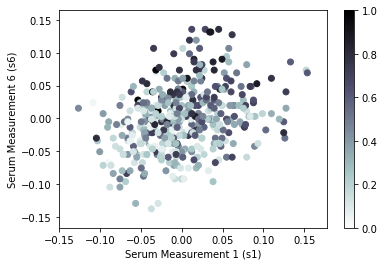

In [28]:
norm = Normalize(vmin=y.min(), vmax=y.max()) # need to normalize target to [0,1] range for use with colormap
plt.scatter(X[:, 4], X[:, 9], c=norm(y), cmap=cm.bone_r)
plt.colorbar()
plt.xlabel('Serum Measurement 1 (s1)')
plt.ylabel('Serum Measurement 6 (s6)')

plt.show()


Make your own plot
===
Below, try making your own plots. First, modify the previous code to create a similar plot, comparing different pairs of features. You can start by copying and pasting the previous block of code to the cell below, and modifying it to work.

In [ ]:
# Put your code here!

Training and Testing Sets
===

In order to evaluate our data properly, we need to divide our dataset into training and testing sets.
* **Training Set** - Portion of the data used to train a machine learning algorithm. These are the examples that the computer will learn from in order to try to predict data labels.
* **Testing Set** - Portion of the data (usually 10-30%) not used in training, used to evaluate performance. The computer does not "see" this data while learning, but tries to guess the data labels. We can then determine the accuracy of our method by determining how many examples it got correct.
* **Validation Set** - (Optional) A third section of data used for parameter tuning or classifier selection. When selecting among many classifiers, or when a classifier parameter must be adjusted (tuned), a this data is used like a test set to select the best parameter value(s). The final performance is then evaluated on the remaining, previously unused, testing set.

Creating training and testing sets
---
Below, we create a training and testing set from the iris dataset using using the [train_test_split()](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) function. 

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Original dataset size: ' + str(X.shape))
print('Training dataset size: ' + str(X_train.shape))
print('Test dataset size: ' + str(X_test.shape))

Original dataset size: (442, 10)
Training dataset size: (309, 10)
Test dataset size: (133, 10)


Create validation set using crossvalidation
---
Crossvalidation allows us to use as much of our data as possible for training without training on our test data. We use it to split our training set into training and validation sets.
* Divide data into multiple equal sections (called folds)
* Hold one fold out for validation and train on the other folds
* Repeat using each fold as validation

The [KFold()](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) function returns an iterable with pairs of indices for training and testing data.

In [30]:
from sklearn.model_selection import KFold

# Older versions of scikit learn used n_folds instead of n_splits
kf = KFold(n_splits=5)
for trainInd, valInd in kf.split(X_train):
    X_tr = X_train[trainInd,:]
    y_tr = y_train[trainInd]
    X_val = X_train[valInd,:]
    y_val = y_train[valInd]
    print("%s %s" % (X_tr.shape, X_val.shape))

(247, 10) (62, 10)
(247, 10) (62, 10)
(247, 10) (62, 10)
(247, 10) (62, 10)
(248, 10) (61, 10)


More information on different methods for creating training and testing sets is available at scikit-learn's [crossvalidation](http://scikit-learn.org/stable/modules/cross_validation.html) page.